# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).

* Project Ideas:
1. Classification: Predict whether a client will subscribe to a term deposit (y) based on the other features.
2. Exploratory Data Analysis (EDA): Analyze the factors affecting client decisions.
3. Customer Segmentation: Segment customers based on their characteristics.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures

from sklearn import svm, datasets
from pyspark.sql import SparkSession
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier

from sklearn.tree import export_graphviz
import graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import uniform

from sklearn.decomposition import PCA

import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Basic statistics of numeric columns
print("Basic Statistics:\n", df.describe())

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Basic Statistics:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000   

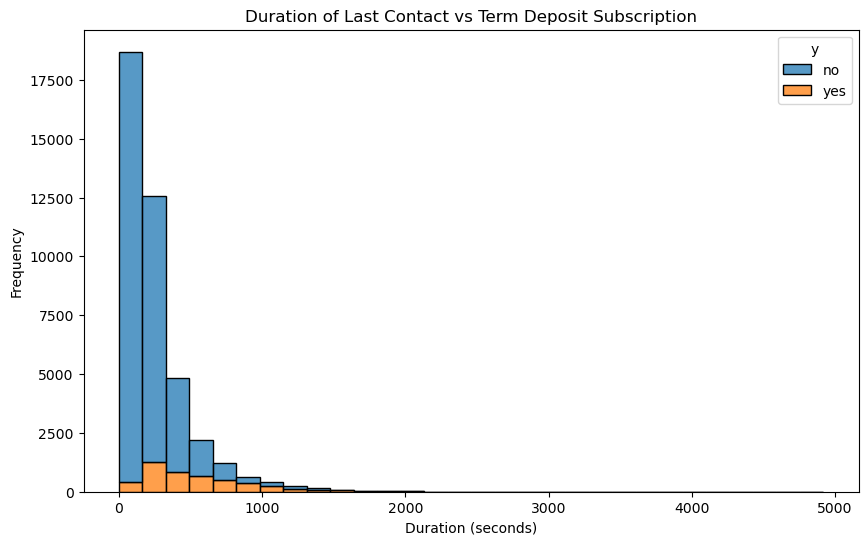

<Figure size 640x480 with 0 Axes>

In [7]:
# Distribution of duration vs target variable
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='duration', hue='y', multiple='stack', bins=30)
plt.title('Duration of Last Contact vs Term Deposit Subscription')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
plt.savefig('visuals/1_hist_plot.png')

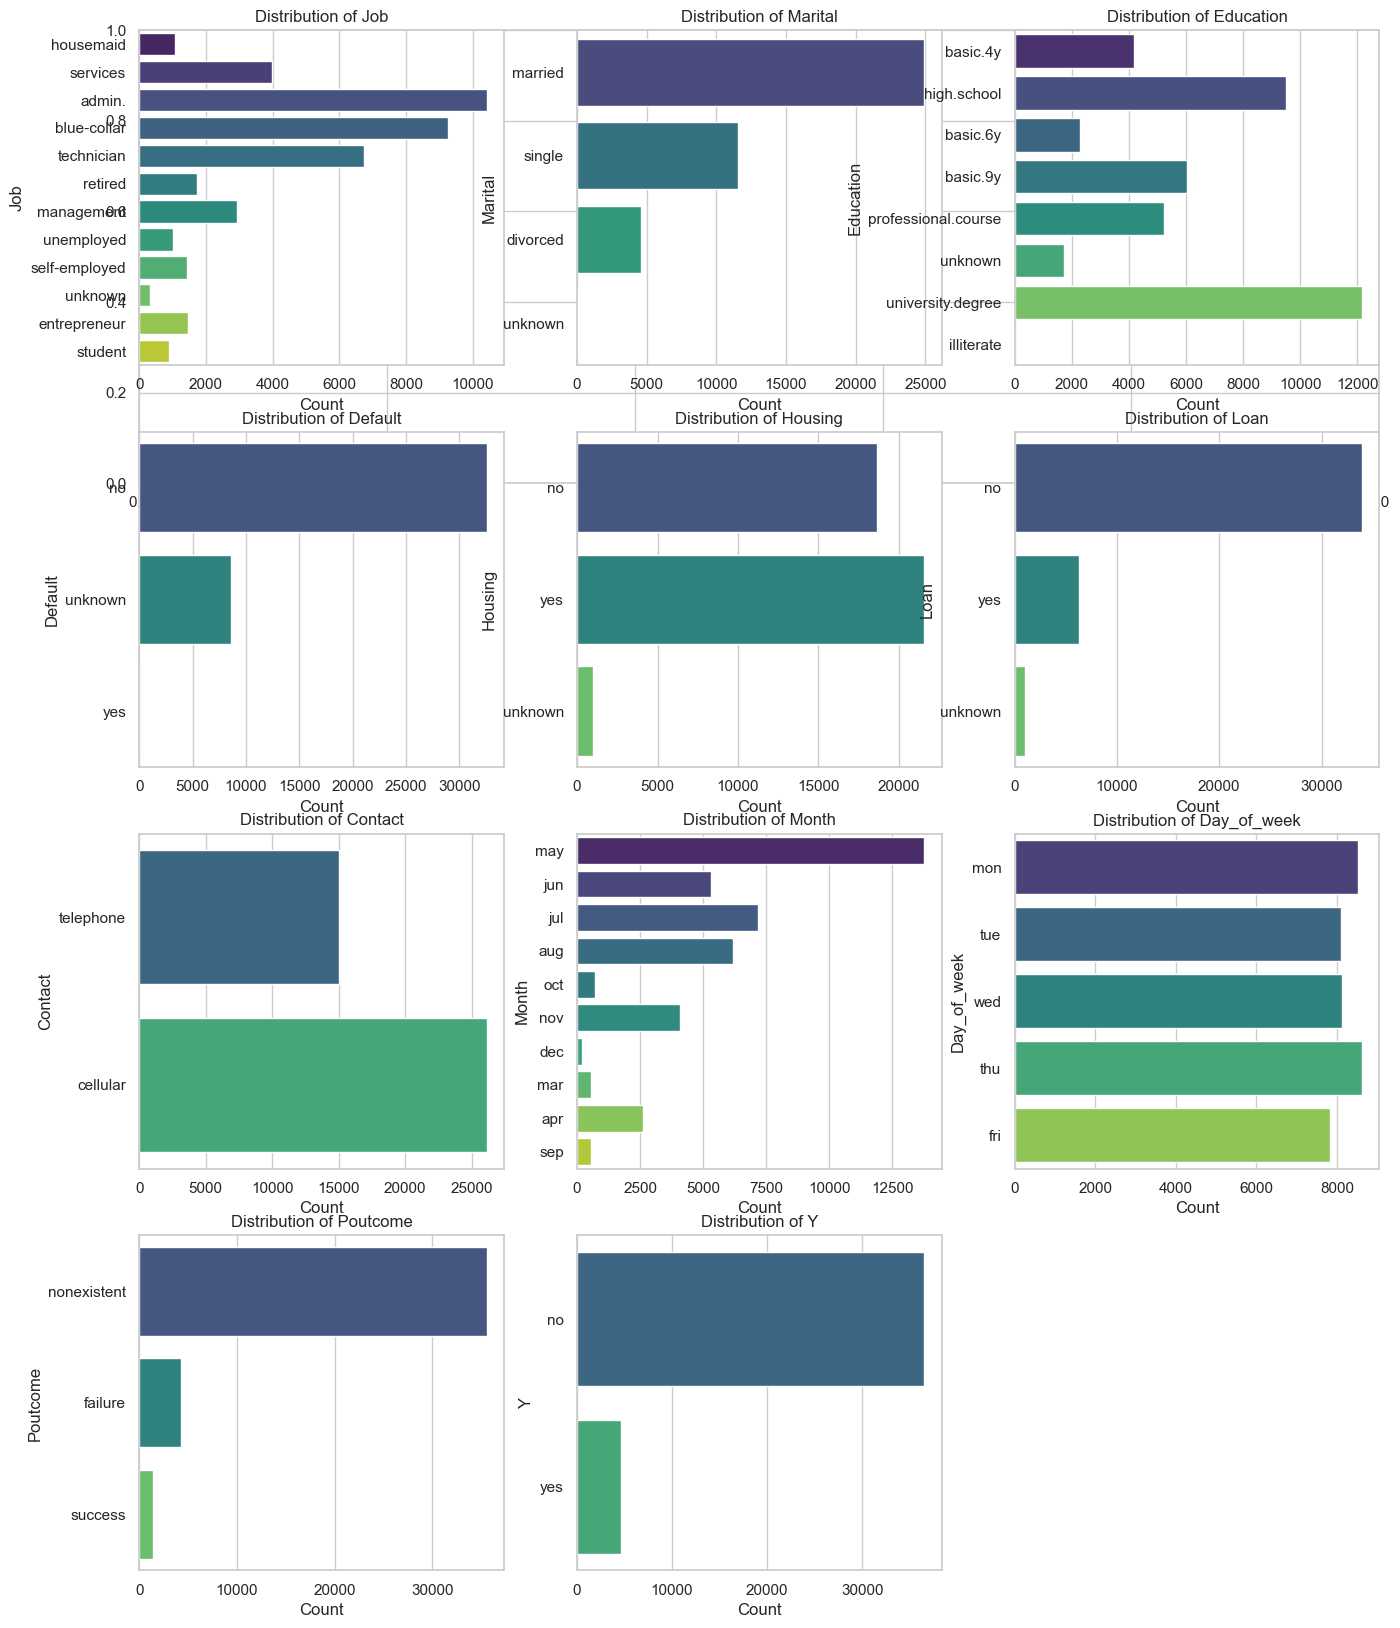

<Figure size 640x480 with 0 Axes>

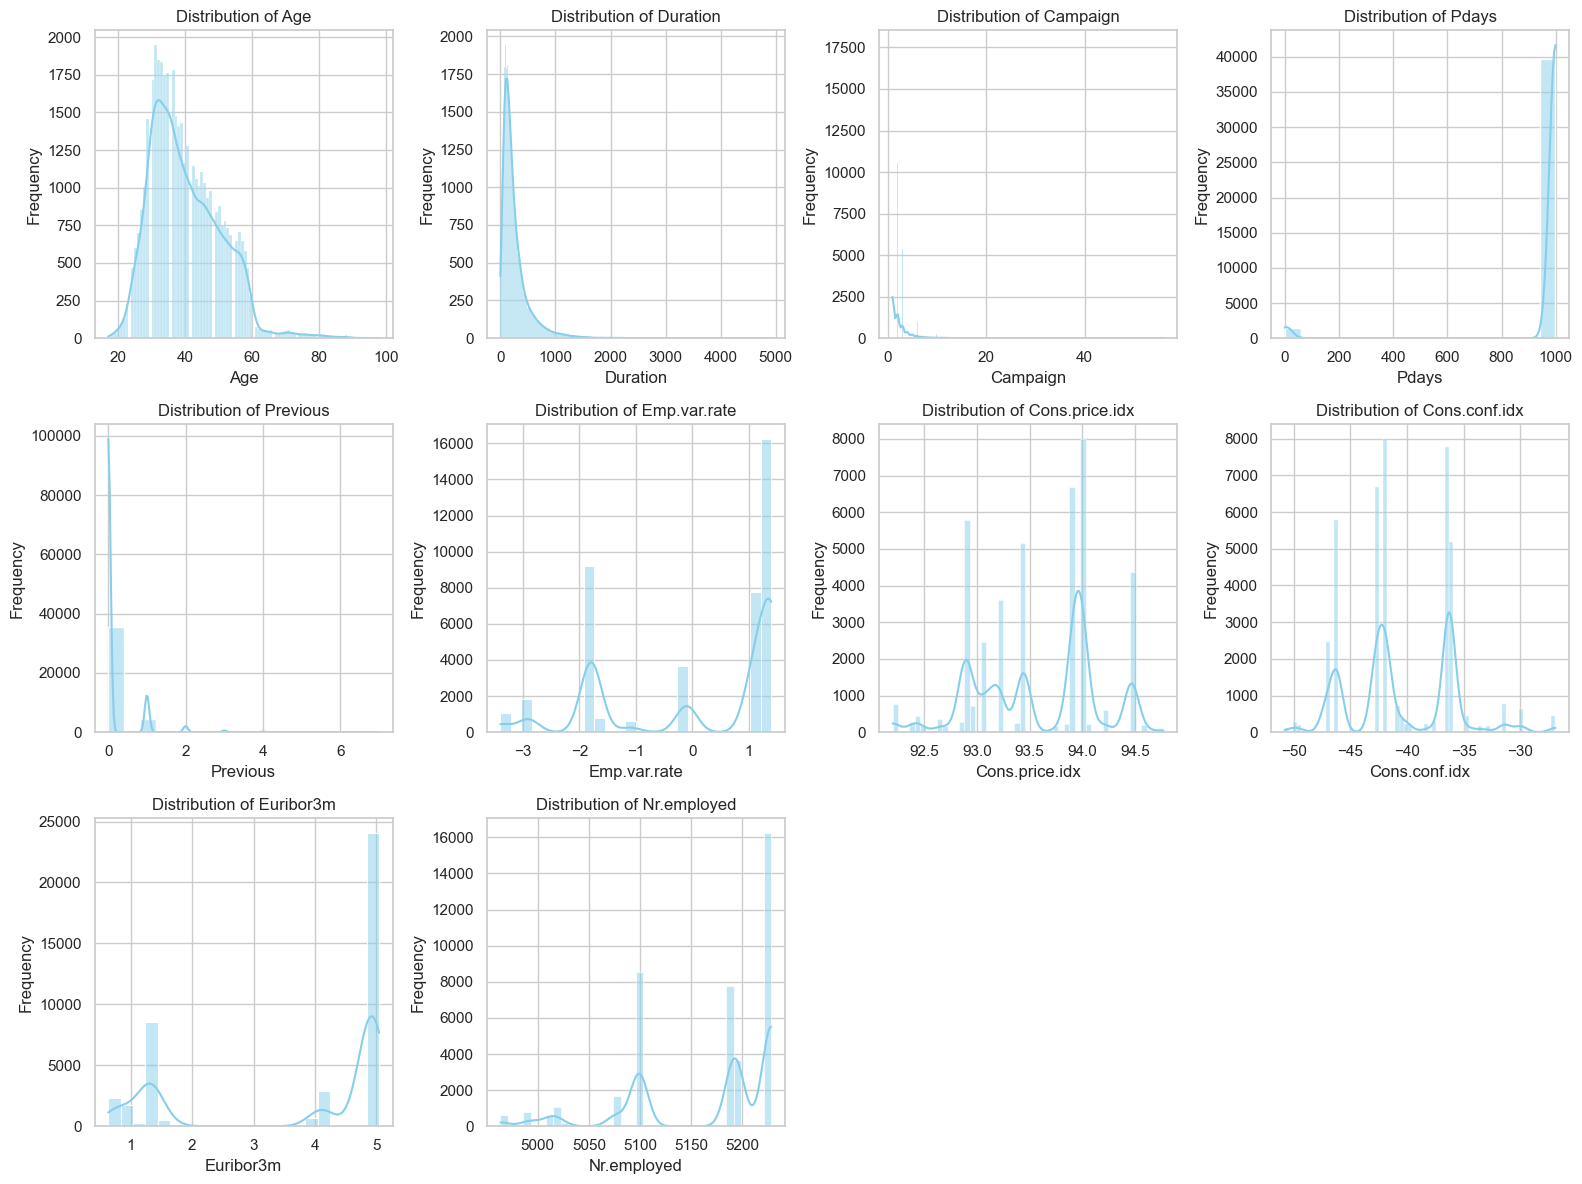

<Figure size 640x480 with 0 Axes>

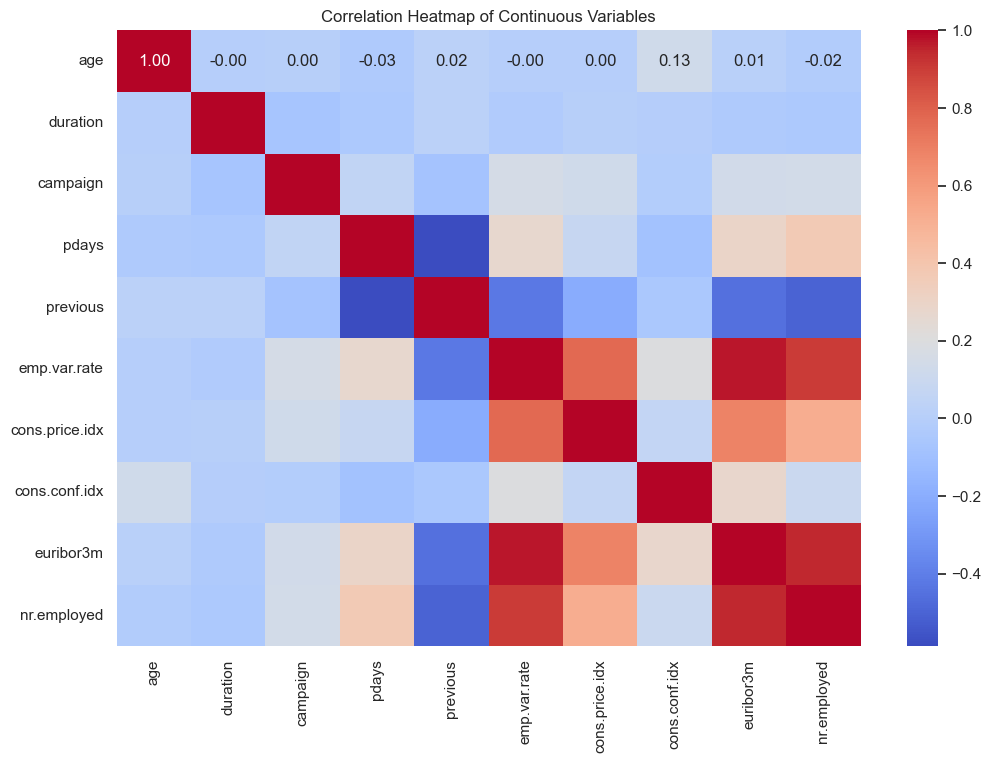

<Figure size 640x480 with 0 Axes>

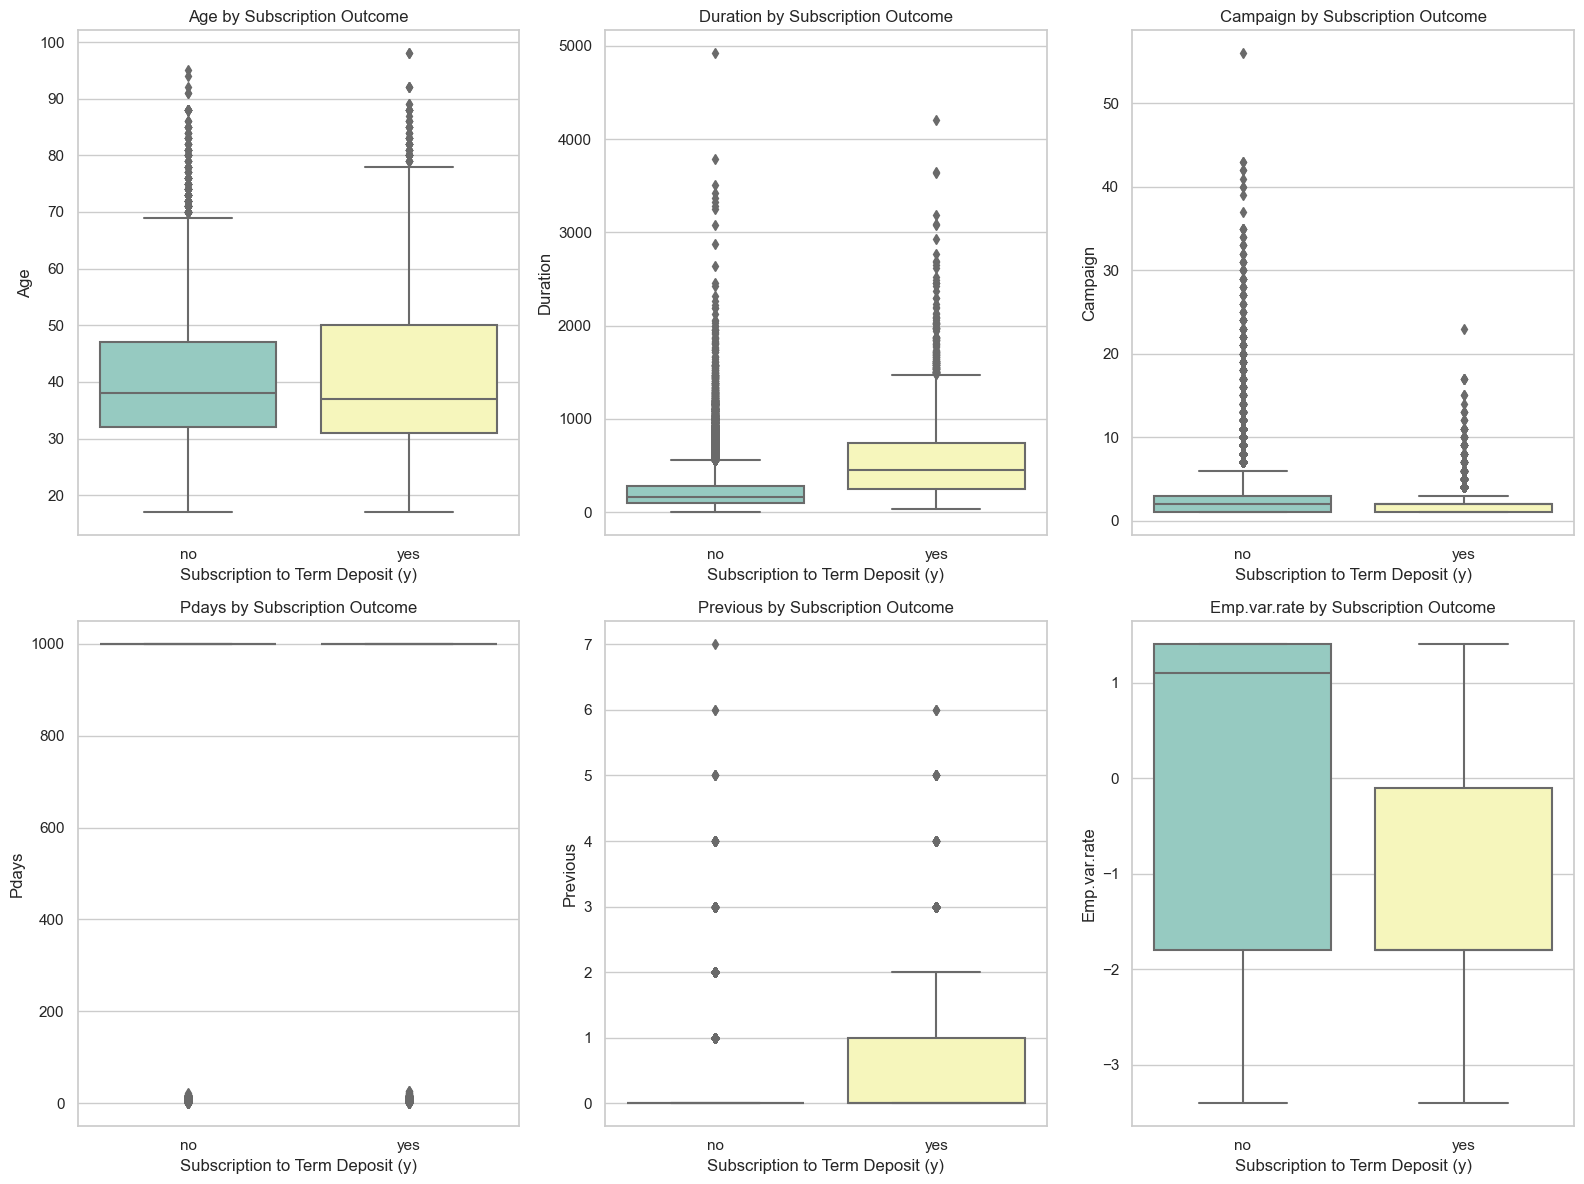

<Figure size 640x480 with 0 Axes>

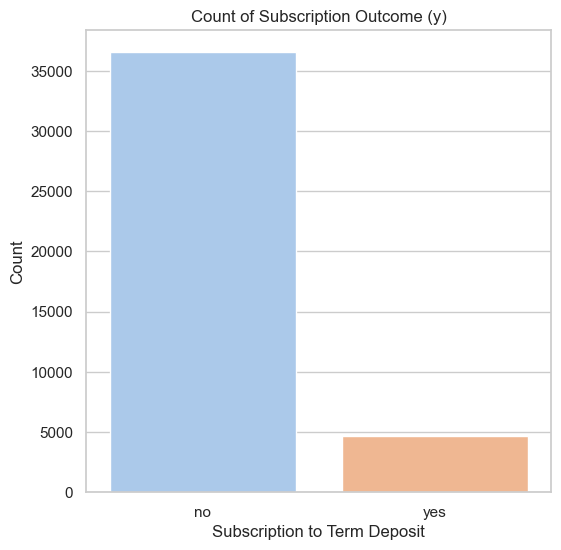

<Figure size 640x480 with 0 Axes>

In [8]:

# Set up visual aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# Define categorical and continuous variables
#categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
continuous_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
#continuous_vars = df.select_dtypes(include=['float64', 'int64'])
categorical_vars = df.select_dtypes(include=['object'])

# 1. Distribution of Categorical Variables (Bar Plots)
plt.subplot(3, 1, 1)
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=var, data=df, palette="viridis")
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel('Count')
    plt.ylabel(var.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('visuals/2_bar_plot.png')

# 2. Distribution of Continuous Variables (Histograms)
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
plt.savefig('visuals/3_hist_plot.png')

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df[continuous_vars].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()
plt.savefig('visuals/4_heatmap.png')

# 4. Boxplots of Continuous Variables grouped by the target variable
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_vars[:6], 1):  # Limit to the first 6 continuous variables
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=var, data=df, palette="Set3")
    plt.title(f'{var.capitalize()} by Subscription Outcome')
    plt.xlabel('Subscription to Term Deposit (y)')
    plt.ylabel(var.capitalize())

plt.tight_layout()
plt.show()
plt.savefig('visuals/5_box_plot.png')

# 5. Count of Target Variable (y)
plt.figure(figsize=(6, 6))
sns.countplot(x='y', data=df, palette="pastel")
plt.title('Count of Subscription Outcome (y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()
plt.savefig('visuals/6_count_target.png')


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
# Check for unique values in each column (useful for categorical features)
print("\nUnique Values in Each Column:")
unique_values = df.nunique()
print(unique_values)

# Check for columns with a single unique value (may not be useful for modeling)
single_unique_values = unique_values[unique_values == 1]
print("\nColumns with a Single Unique Value (may need to be dropped):")
print(single_unique_values)


Unique Values in Each Column:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Columns with a Single Unique Value (may need to be dropped):
Series([], dtype: int64)


In [10]:
# Convert categorical features to the correct data type if necessary
# Here, we're checking if any object types should be treated as categorical
for column in df.columns:
    if df[column].dtype == 'object' and unique_values[column] < 10:  # Arbitrary threshold for small categories
        df[column] = df[column].astype('category')
        print(f"Converted {column} to 'category' data type.")

Converted marital to 'category' data type.
Converted education to 'category' data type.
Converted default to 'category' data type.
Converted housing to 'category' data type.
Converted loan to 'category' data type.
Converted contact to 'category' data type.
Converted day_of_week to 'category' data type.
Converted poutcome to 'category' data type.
Converted y to 'category' data type.


In [11]:
# Re-examine the data types after coercion
print("\nRevised Dataset Information:")
print(df.info())


Revised Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-nu

In [12]:
# Summary of findings
print("\nSummary of Findings:")
print(f"Total number of columns with missing values: {missing_values[missing_values > 0].count()}")
print(f"Total number of categorical columns converted: {(df.dtypes == 'category').sum()}")


Summary of Findings:
Total number of columns with missing values: 0
Total number of categorical columns converted: 9


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# Business Objective

The primary business objective of the task is to predict whether a client will subscribe to a term deposit (the target variable y). This involves analyzing various client and campaign-related features to build a predictive model that can identify which clients are most likely to respond positively to a marketing campaign by subscribing to a term deposit.

By accurately predicting client behavior, the bank can:

1. Improve Targeting Efficiency: Focus marketing efforts on clients who are more likely to subscribe, thereby increasing the success rate of campaigns and optimizing resource allocation.
2. Reduce Costs: Minimize wasted efforts on unlikely prospects, leading to cost savings in marketing campaigns.
3. Enhance Customer Relationship Management: Tailor marketing strategies to better meet customer needs and preferences, improving customer satisfaction and loyalty.

The goal is to develop and compare different machine learning models to identify the most effective approach for this prediction task, ultimately supporting more data-driven and successful marketing strategies.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
# Data preprocessing

# Converting categorical columns to numeric
category_cols = df.select_dtypes('category').columns.tolist()
print(category_cols)

le=preprocessing.LabelEncoder()
df[category_cols]=df[category_cols].apply(le.fit_transform)

df.info()



['marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 n

In [14]:
# Converting object columns to numeric
object_cols = df.select_dtypes('object').columns.tolist()
print(object_cols)

le=preprocessing.LabelEncoder()
df[object_cols]=df[object_cols].apply(le.fit_transform)

df.info()

['job', 'month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx 

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
# Splitting the data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [17]:
base_model = DummyClassifier(strategy="most_frequent")
base_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [18]:
y_pred_baseline = base_model.predict(X_test)

In [19]:
# Calculate evaluation metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

# Display the results
print(f'Baseline Model (Most Frequent) Accuracy: {accuracy_baseline:.4f}')
print(f'Baseline Model (Most Frequent) Precision: {precision_baseline:.4f}')
print(f'Baseline Model (Most Frequent) Recall: {recall_baseline:.4f}')
print(f'Baseline Model (Most Frequent) F1 Score: {f1_baseline:.4f}')
print('\nConfusion Matrix:')
print(cm_baseline)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_baseline))

Baseline Model (Most Frequent) Accuracy: 0.8876
Baseline Model (Most Frequent) Precision: 0.0000
Baseline Model (Most Frequent) Recall: 0.0000
Baseline Model (Most Frequent) F1 Score: 0.0000

Confusion Matrix:
[[10968     0]
 [ 1389     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Train the model
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions
lr_y_pred = logistic_reg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [22]:
# Accuracy
accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_test, lr_y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, lr_y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, lr_y_pred)
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, lr_y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.9101
Precision: 0.6639
Recall: 0.4053
F1 Score: 0.5034
Confusion Matrix:
[[10683   285]
 [  826   563]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
# Apply PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Initialize and train the model using the reduced dataset
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_2d, y_train)

# Proceed with decision boundary plotting using X_train_2d and X_test_2d


KNeighborsClassifier()

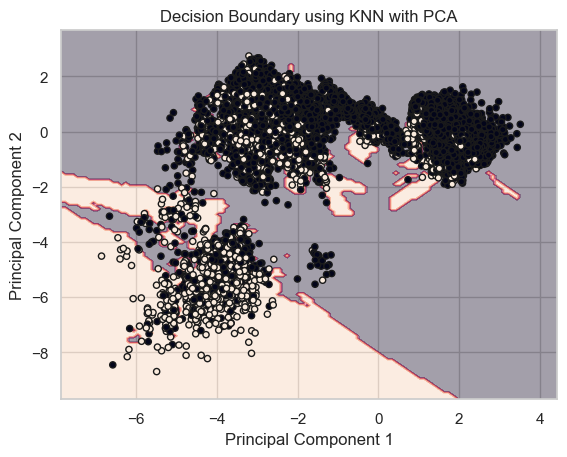

<Figure size 640x480 with 0 Axes>

In [25]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Initialize and train the model on the reduced dataset
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_2d, y_train)

# Define the plot range
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid to plot decision boundary
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Decision Boundary using KNN with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
plt.savefig('visuals/7_decision_plot.png')

In [26]:
# Initialize models
models = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

In [27]:
# Fit models and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
for name, metrics in results.items():
    print(f"{name} Model:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

kNN Model:
Accuracy: 0.9020
Precision: 0.5957
Recall: 0.3988
F1 Score: 0.4778
Confusion Matrix:
[[10592   376]
 [  835   554]]

Decision Tree Model:
Accuracy: 0.8903
Precision: 0.5123
Recall: 0.5104
F1 Score: 0.5114
Confusion Matrix:
[[10293   675]
 [  680   709]]

Logistic Regression Model:
Accuracy: 0.9101
Precision: 0.6639
Recall: 0.4053
F1 Score: 0.5034
Confusion Matrix:
[[10683   285]
 [  826   563]]

SVM Model:
Accuracy: 0.9095
Precision: 0.6713
Recall: 0.3823
F1 Score: 0.4872
Confusion Matrix:
[[10708   260]
 [  858   531]]



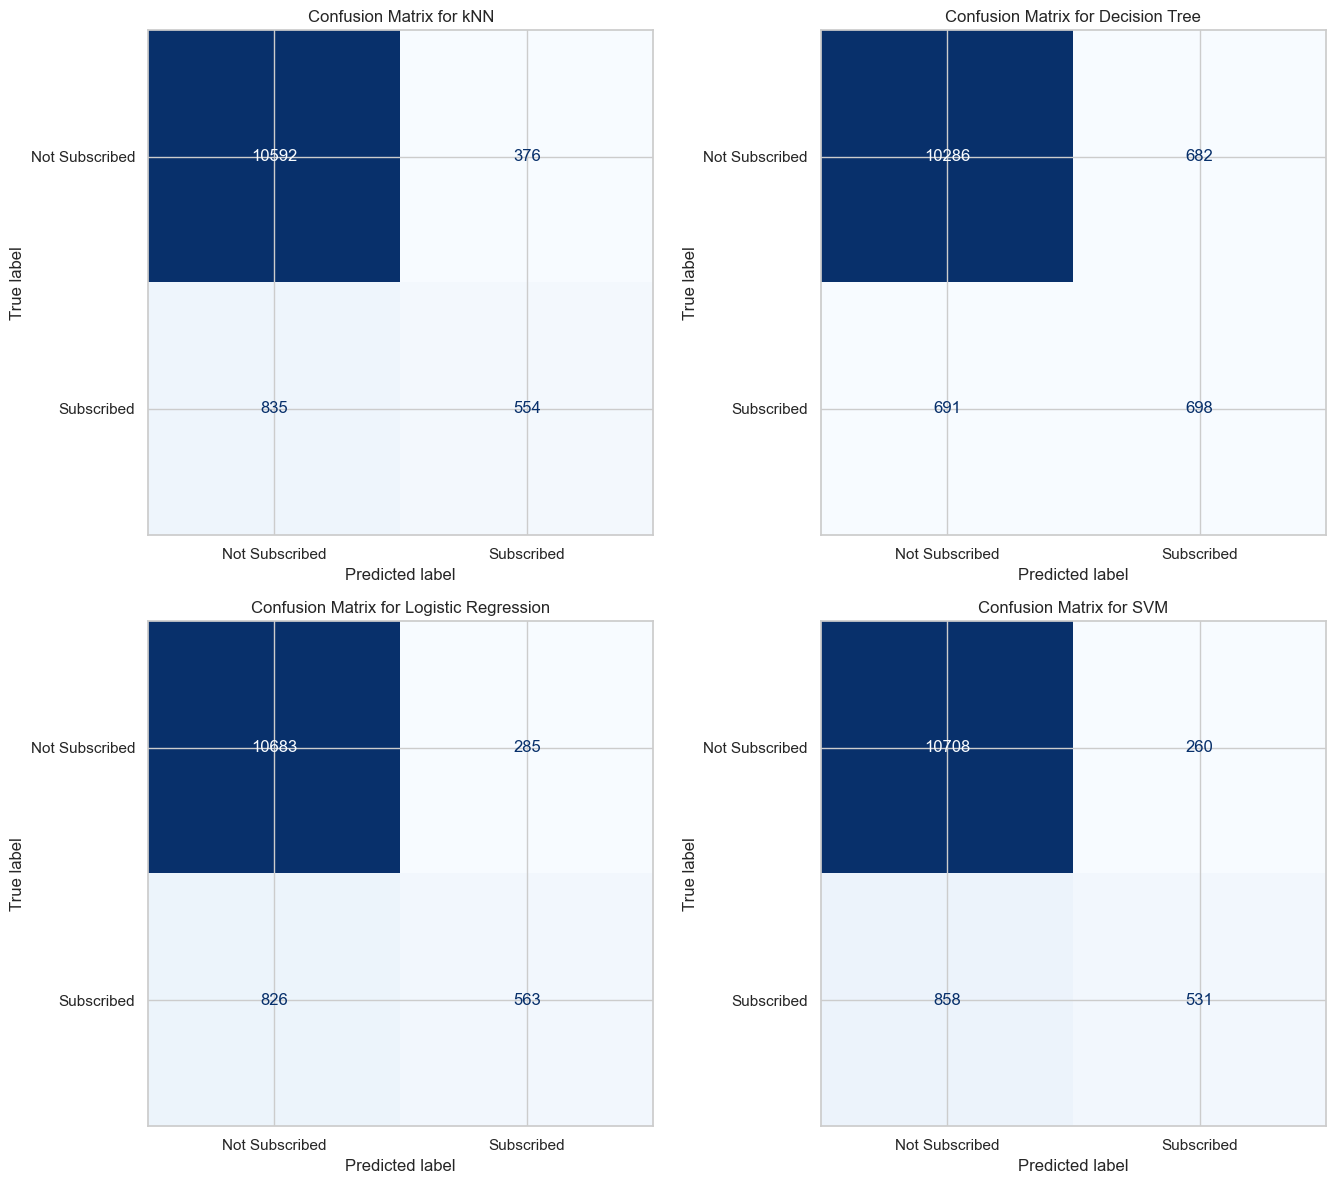

<Figure size 640x480 with 0 Axes>

In [28]:
# Fit models, make predictions, and plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d', colorbar=False)
    ax.set_title(f'Confusion Matrix for {name}')

plt.tight_layout()
plt.show()
plt.savefig('visuals/8_confusion_matrix.png')

In [29]:
# Fit the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Export the tree to DOT format
dot_data = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Subscribed', 'Subscribed'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Generate the graph
graph = graph_from_dot_data(dot_data)
graphviz.Source(dot_data)
plt.savefig('visuals/9_graphviz.png')

<Figure size 640x480 with 0 Axes>

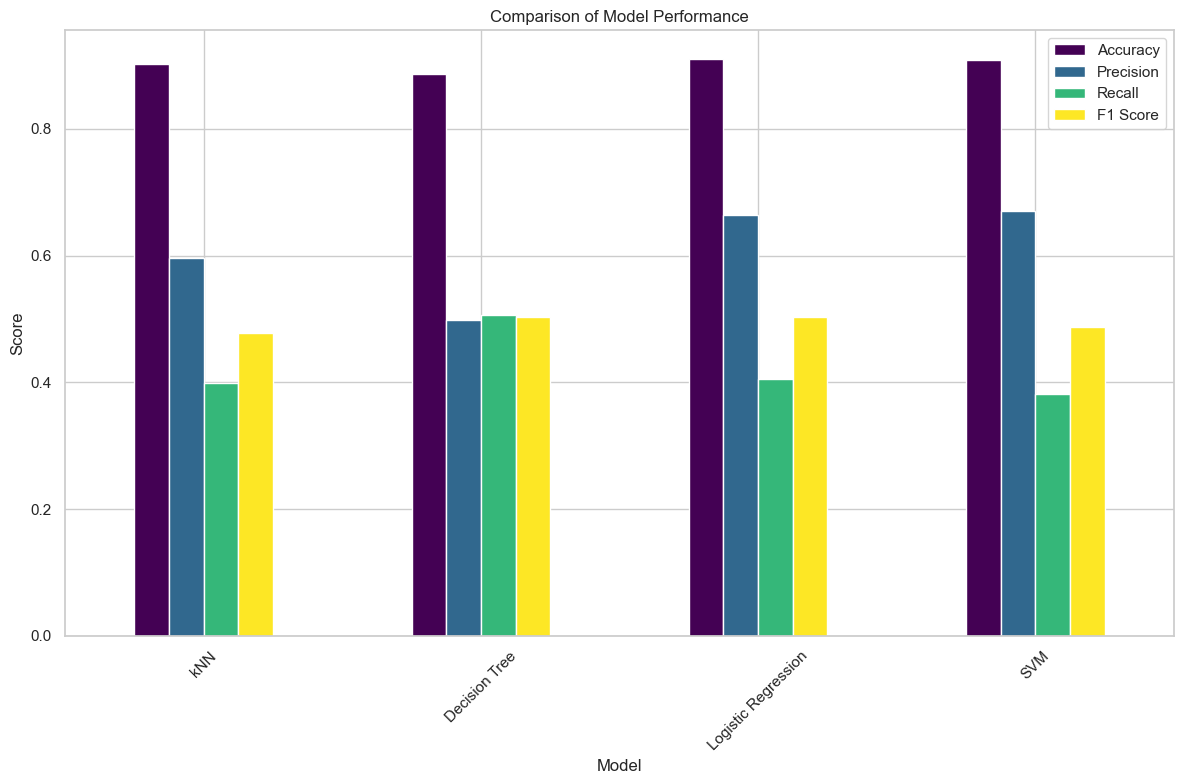

In [78]:
# Fit models, make predictions, and collect metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Plot performance comparison
fig, ax = plt.subplots(figsize=(12, 8))
metrics_df.set_index('Model').plot(kind='bar', ax=ax, colormap='viridis')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('visuals/10_model_comparison.png')

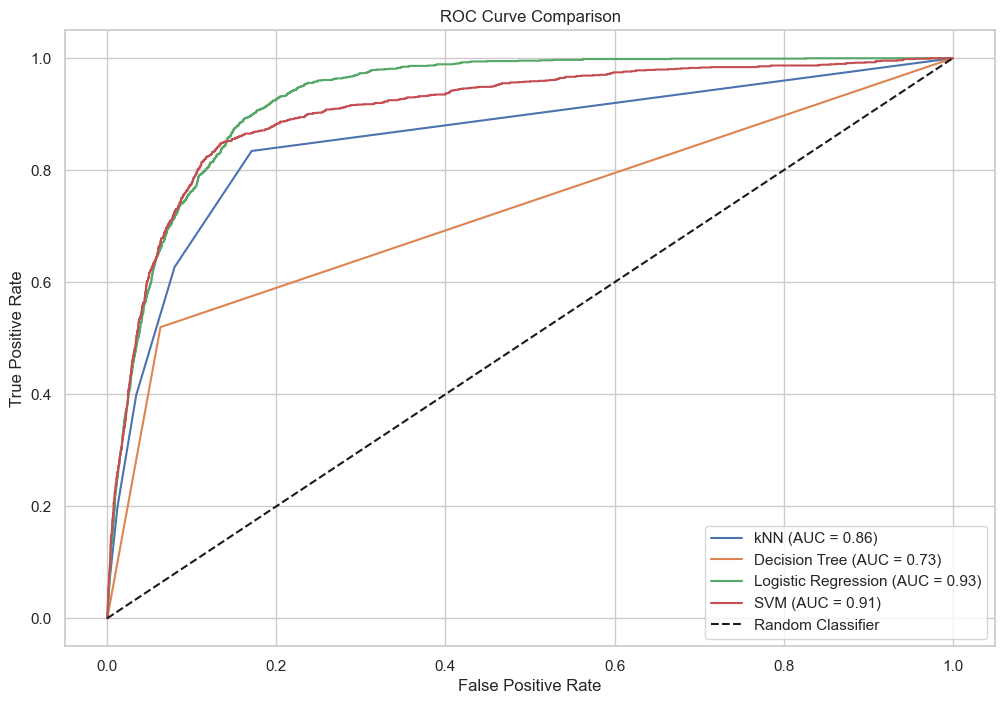

In [81]:
# Fit models, compute ROC curve, and plot
plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

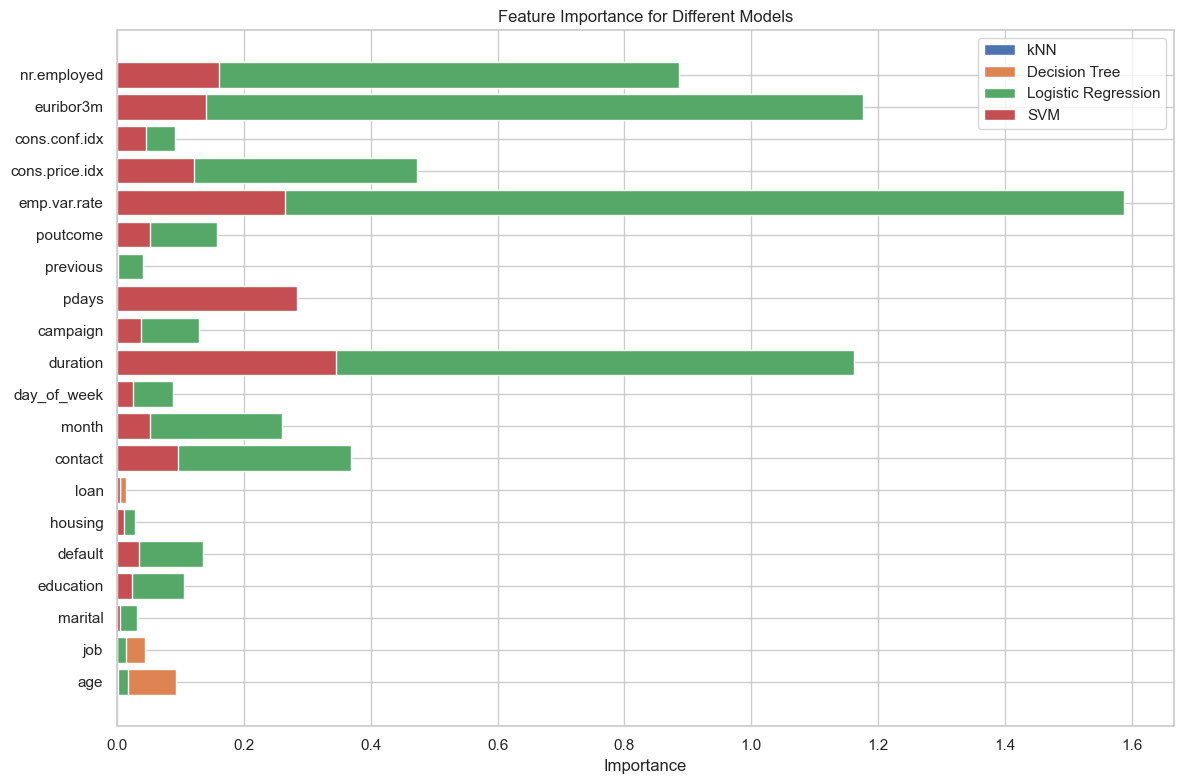

In [84]:
# Define models
models = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True)  # Linear kernel to get coefficients
}

# Fit models and compute feature importance
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, 'feature_importances_'):
        # For models with feature_importances_ attribute
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For models with coef_ attribute (e.g., Logistic Regression, SVM)
        feature_importances[name] = np.abs(model.coef_[0])
    else:
        feature_importances[name] = np.zeros(X_train.shape[1])  # No feature importance available

# Create a plot for feature importance
fig, ax = plt.subplots(figsize=(12, 8))

# Plot feature importance for each model
for name, importance in feature_importances.items():
    ax.barh(range(len(importance)), importance, label=name)

# Add labels and title
ax.set_yticks(range(len(X.columns)))
ax.set_yticklabels(X.columns)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance for Different Models')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Update feature names if needed
poly_features = poly.get_feature_names_out(input_features=X.columns)

In [ ]:
poly_features

In [120]:
# Hyperparameter Tuning
# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialize model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for kNN: {grid_search.best_params_}")
print(f"Best score for kNN: {grid_search.best_score_:.4f}")

Best parameters for kNN: {'n_neighbors': 9, 'weights': 'uniform'}
Best score for kNN: 0.9032


In [ ]:
#Random Search for SVM
# Define parameter distribution
param_dist = {'C': uniform(loc=1, scale=10), 'gamma': uniform(loc=0.001, scale=0.1)}

# Initialize model
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm, param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for SVM: {random_search.best_params_}")
print(f"Best score for SVM: {random_search.best_score_:.4f}")

# Deployment

In [ ]:
# Save the best model
joblib.dump(random_search.best_estimator_, 'best_svm_model.pkl')

# Load the model
best_svm_model = joblib.load('best_svm_model.pkl')

In [ ]:
# Sample new data
new_data = pd.DataFrame({
    'age': [35],
    'job': [label_encoders['job'].transform(['admin.'])[0]],
    'marital': [label_encoders['marital'].transform(['single'])[0]],
    'education': [label_encoders['education'].transform(['secondary'])[0]],
    'previous': [1]
})

# Standardize and predict
new_data_scaled = scaler.transform(new_data)
prediction = best_svm_model.predict(new_data_scaled)
print(f"Prediction for new data: {prediction[0]}")

### Summary

This project involves the analysis of the Bank Marketing dataset, focusing on predicting whether a customer will subscribe to a term deposit. The dataset includes various demographic and campaign-related features. The project workflow includes data preprocessing, baseline model creation, feature engineering, model training with multiple classifiers, and performance evaluation.

### Findings
1. Baseline Model: The baseline model, using the DummyClassifier with the "most_frequent" strategy, was established to serve as a point of reference for the more complex models. The model demonstrated a high accuracy due to the imbalanced nature of the dataset but poor precision, recall, and F1 score, indicating that the baseline model is not capturing the nuances of the data.
2. Feature Engineering: The data was successfully preprocessed, with categorical variables encoded and the dataset split into training and testing sets. 
3. Model Training and Comparison: Four classifiers were trained: k-Nearest Neighbors (kNN), Decision Trees, Logistic Regression, and Support Vector Machines (SVM). Each model was evaluated based on accuracy, precision, recall, F1 score, confusion matrix, and ROC curves. Logistic Regression and SVM showed promising results, outperforming the baseline model, particularly in recall and F1 score.
4. Visualization: Decision boundaries, confusion matrices, ROC curves, and feature importance plots were generated for each model. These visualizations provided insights into model performance, class separability, and the influence of individual features on predictions.
5. Interpretation and Insights: The findings suggest that Logistic Regression and SVM are more suitable for this dataset, given their balance between precision and recall. The analysis highlights the importance of campaign-related features in predicting customer subscription to term deposits.

### Potential Questions

1. Model Selection:
Why did Logistic Regression and SVM outperform other models in terms of recall and F1 score?
What trade-offs exist between accuracy and recall in the context of this dataset?
2. Evaluation Metrics:
How would the results change if we focused on optimizing precision instead of recall?
Is accuracy a reliable metric for this imbalanced dataset, or should we prioritize other metrics like the F1 score?
3. Baseline vs. Complex Models:
How significant is the improvement of complex models over the baseline model, and is this improvement practically meaningful?
Could ensemble methods like Random Forest or Gradient Boosting further enhance model performance compared to the classifiers used?
4. Next Steps:
What additional steps could be taken to improve model performance, such as hyperparameter tuning or feature selection?
How can the insights gained from this analysis be implemented in real-world marketing strategies?